In [1]:
import ISLP
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
from ISLP.models import (ModelSpec as MS,
summarize,poly)
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

# Question 8

In [3]:
Auto=ISLP.load_data('Auto')
Auto.reset_index(inplace=True)
Auto[:2]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1


In [4]:
y=Auto['mpg'].reset_index(drop=True)
X=pd.DataFrame(data={'intercept':np.ones(y.shape[0]),'horsepower':Auto['horsepower'].reset_index(drop=True)})
X[:2]

,intercept,horsepower
0,1.0,130
1,1.0,165


In [5]:
model1=sm.OLS(y,X)#.fit_transform()
result1=model1.fit()

In [6]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           7.03e-81
Time:                        16:47:37   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(392, 2) (392,)


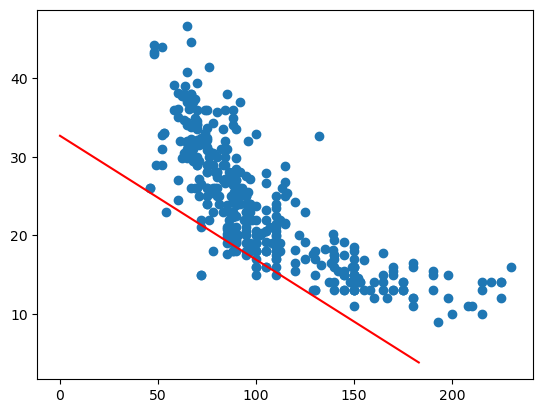

In [7]:
plt.scatter(X['horsepower'],y)
print(X.shape,y.shape)
max_x = X['horsepower'].max()
min_x = X['horsepower'].min()
x = np.arange(min_x, max_x, 1)
y_ = 39.9359+(-0.1578)*x 	
plt.plot(y_,'r')

In [8]:
#mpg for 98hp
mpg=39.9359+(-0.1578)*98
mpg

24.4715

In [10]:
X=MS(['horsepower']).fit_transform(Auto)
# new_df = pd.DataFrame(data={'intercept':1,'horsepower':98})
newX = pd.DataFrame(data={'intercept':1,'horsepower':98},index=[0])
new_predictions = result1.get_prediction(newX)
print(f"Confidence interval= {new_predictions.conf_int()}, \
Prediction Interval= {new_predictions.conf_int(obs=True)}")

Confidence interval= [[23.97307896 24.96107534]], Prediction Interval= [[14.80939607 34.12475823]]


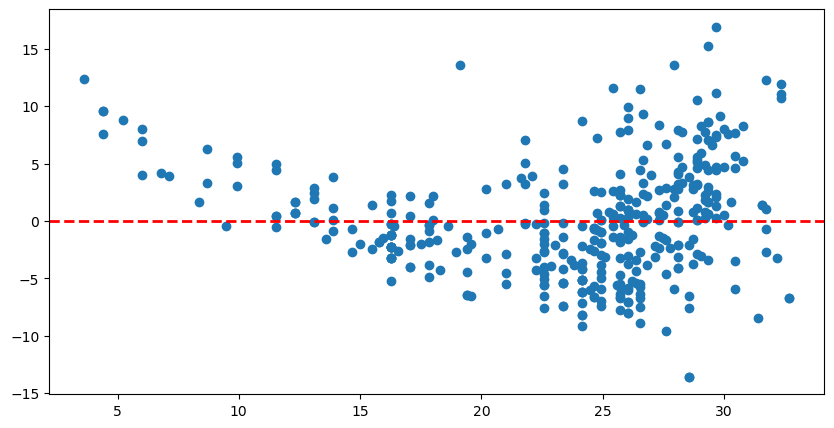

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(result1.fittedvalues,result1.resid)
plt.axhline(y=0,c='red',lw=2,ls='--')

Text(0, 0.5, 'Residuals')

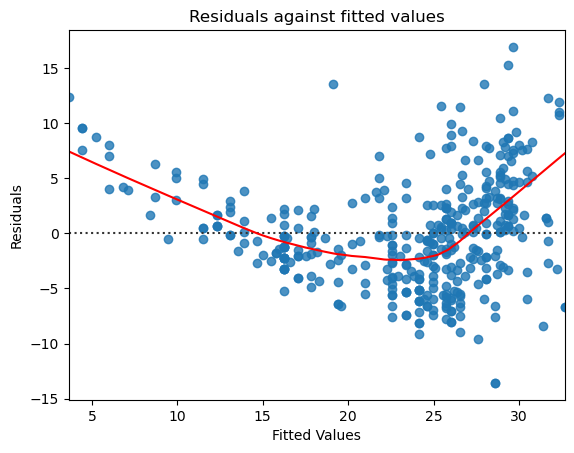

In [12]:
sns.residplot(x=result1.fittedvalues,y=result1.resid,
              line_kws={'color': 'red', 'lw': 1.5, 'alpha': 1},lowess=True)
plt.title("Residuals against fitted values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

# Question 9

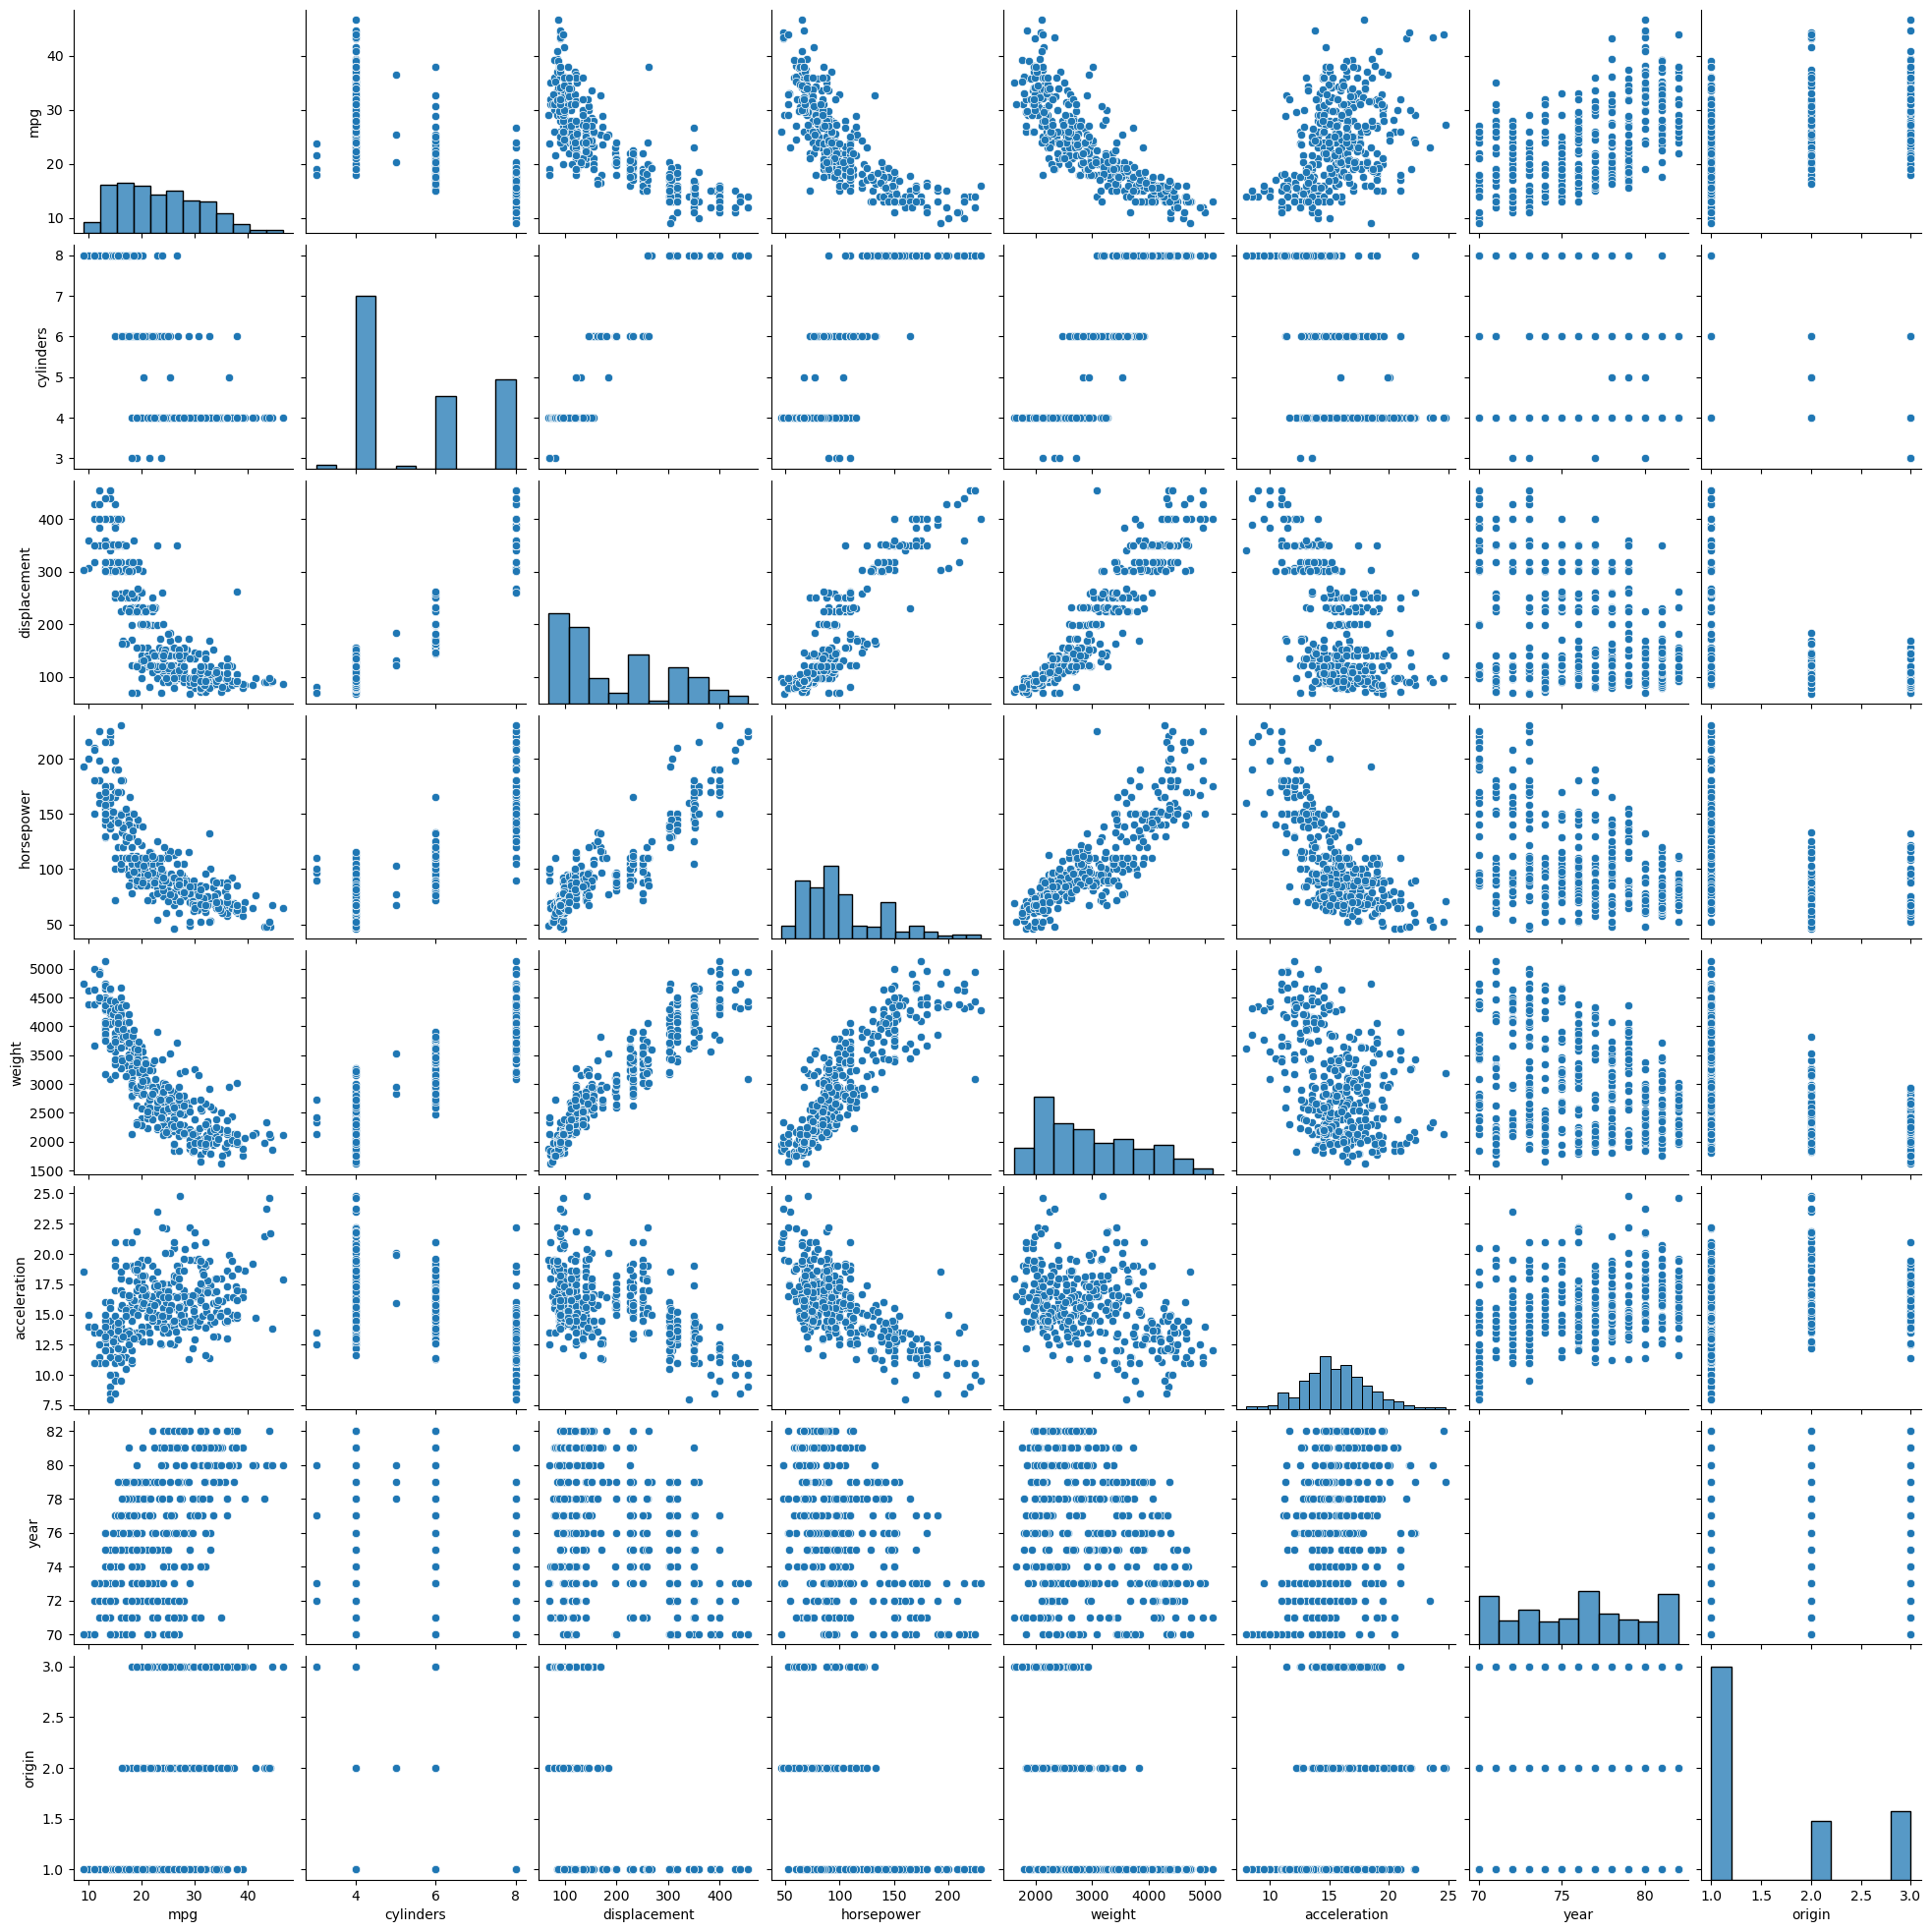

In [13]:
sns.pairplot(Auto)

In [14]:
Auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<Axes: >

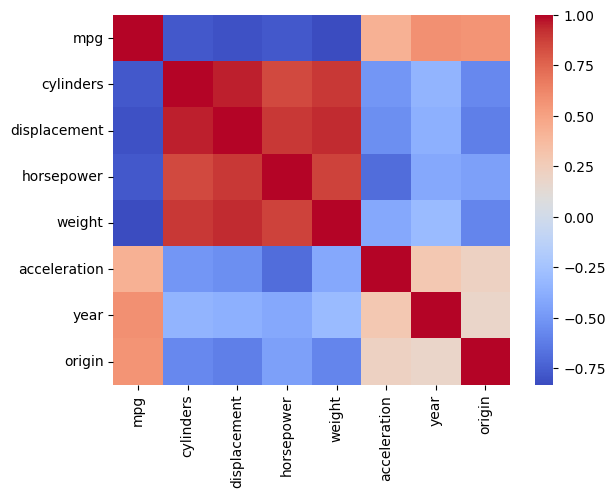

In [15]:
sns.heatmap(Auto.corr(numeric_only=True),cmap='coolwarm')

In [16]:
Auto.drop(columns=["mpg","name"])[:2]

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1


In [17]:
idx=Auto.columns.drop(["mpg","name"])
X=MS(idx).fit_transform(Auto)
results=sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          2.04e-139
Time:                        23:28:36   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
anova_lm(results,result1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,390.0,9385.915872,-6.0,-5133.703341,35.552281,NaN


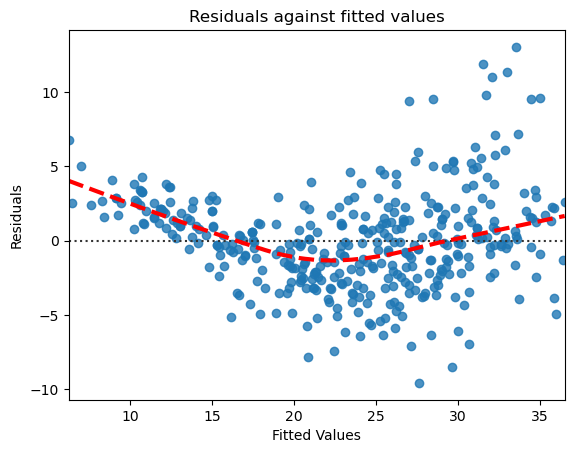

In [19]:
sns.residplot(x=results.fittedvalues,y=results.resid,lowess=True,
              line_kws={'color':'red','lw':3,'ls' : "--"})
plt.title("Residuals against fitted values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

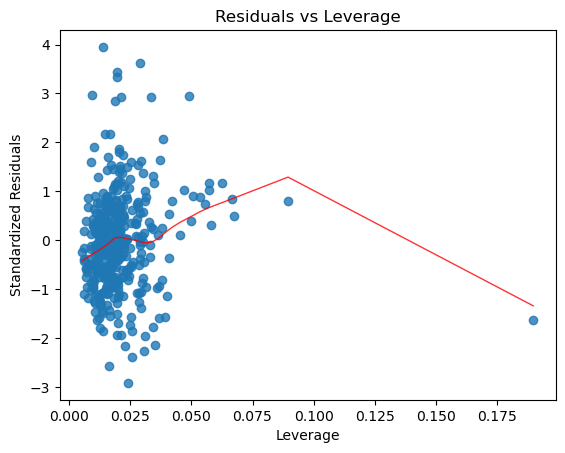

In [20]:
standardised_residual=results.get_influence().resid_studentized_internal
leverage=results.get_influence().hat_matrix_diag
sns.regplot(y=standardised_residual,x=leverage,scatter=True, 
            ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title("Residuals vs Leverage")
plt.xlabel("Leverage")
plt.ylabel("Standardized Residuals")
plt.show()

In [21]:
idx

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [56]:
X=MS([*idx,('horsepower','cylinders'),('horsepower','year')]).fit_transform(Auto)
model=sm.OLS(y,X)
result2=model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     283.1
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          5.43e-163
Time:                        11:34:06   Log-Likelihood:                -961.89
No. Observations:                 392   AIC:                             1944.
Df Residuals:                     382   BIC:                             1983.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept              -40.8773     12.176     -3.357      0.001     -64.817     -16.937
cylinders               -3.0837      0.516     -5.971      0.000      -4.099      -2.068
displacement            -0.0048      0.007     -0.713      0.476      -0.018       0.008
horsepower               0.2260      0.119      1.897      0.059      -0.008       0.460
weight                  -0.0038      0.001     -6.294      0.000      -0.005      -0.003
acceleration            -0.1742      0.088     -1.985      0.048      -0.347      -0.002
year                     1.3597      0.139      9.771      0.000       1.086       1.633
origin                   0.8834      0.243      3.634      0.000       0.405       1.361
horsepower:cylinders     0.0308      0.004      7.336      0.000       0.023       0.039
horsepower:year         -0.0065      0.001     -4.696      0.000      -0.009      -0.004
==============================================================================
Omnibus:                       39.241   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.217
Skew:                           0.596   Prob(JB):                     2.08e-16
Kurtosis:                       4.732   Cond. No.                     7.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
idx

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [65]:
X=MS([*idx.drop('horsepower'),('horsepower','cylinders')
      ,poly('horsepower',2)]
    ,categorical_features=['cylinders','year']).fit_transform(Auto)
model=sm.OLS(y,X)
result3=model.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          6.47e-159
Time:                        10:12:24   Log-Likelihood:                -971.55
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     382   BIC:                             2003.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                       -20.9414      3.710     -5.645      0.000     -28.235     -13.648
cylinders                        -3.2075      0.818     -3.920      0.000      -4.816      -1.599
displacement                     -0.0048      0.007     -0.663      0.508      -0.019       0.009
weight                           -0.0035      0.001     -5.310      0.000      -0.005      -0.002
acceleration                     -0.2361      0.099     -2.392      0.017      -0.430      -0.042
year                              0.7373      0.045     16.459      0.000       0.649       0.825
origin                            0.8978      0.249      3.603      0.000       0.408       1.388
horsepower:cylinders              0.0312      0.007      4.664      0.000       0.018       0.044
poly(horsepower, degree=2)[0]  -200.9648     33.624     -5.977      0.000    -267.075    -134.854
poly(horsepower, degree=2)[1]    10.6648      6.589      1.619      0.106      -2.291      23.620
==============================================================================
Omnibus:                       39.733   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.555
Skew:                           0.605   Prob(JB):                     1.76e-16
Kurtosis:                       4.725   Cond. No.                     7.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + weight + year + origin', Auto).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     439.5
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          7.11e-157
Time:                        11:31:02   Log-Likelihood:                -988.57
No. Observations:                 392   AIC:                             1989.
Df Residuals:                     386   BIC:                             2013.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.6457      3.915     -1.698      0.090     -14.343       1.052
horsepower                 -0.2441      0.027     -9.099      0.000      -0.297      -0.191
np.power(horsepower, 2)     0.0008   9.13e-05      9.170      0.000       0.001       0.001
weight                     -0.0044      0.000    -10.426      0.000      -0.005      -0.004
year                        0.7456      0.046     16.145      0.000       0.655       0.836
origin                      1.0465      0.238      4.405      0.000       0.579       1.514
==============================================================================
Omnibus:                       21.819   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.447
Skew:                           0.414   Prob(JB):                     9.00e-08
Kurtosis:                       4.140   Cond. No.                     4.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower) + weight + year + origin',
              Auto).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     378.6
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          4.62e-158
Time:                        11:31:28   Log-Likelihood:                -982.62
No. Observations:                 392   AIC:                             1979.
Df Residuals:                     385   BIC:                             2007.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  80.3681     25.568      3.143      0.002      30.098     130.638
horsepower                  0.2570      0.148      1.737      0.083      -0.034       0.548
np.power(horsepower, 2)    -0.0002      0.000     -0.571      0.568      -0.001       0.000
np.log(horsepower)        -27.5412      8.000     -3.443      0.001     -43.270     -11.812
weight                     -0.0048      0.000    -11.098      0.000      -0.006      -0.004
year                        0.7561      0.046     16.565      0.000       0.666       0.846
origin                      0.9480      0.236      4.016      0.000       0.484       1.412
==============================================================================
Omnibus:                       17.905   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.299
Skew:                           0.312   Prob(JB):                     4.34e-07
Kurtosis:                       4.185   Cond. No.                     2.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower) + np.sqrt(horsepower) \
+ weight + year + origin', Auto).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     332.9
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          9.16e-159
Time:                        11:32:58   Log-Likelihood:                -977.89
No. Observations:                 392   AIC:                             1972.
Df Residuals:                     384   BIC:                             2004.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -426.3991    167.288     -2.549      0.011    -755.314     -97.485
horsepower                  8.4452      2.676      3.156      0.002       3.184      13.706
np.power(horsepower, 2)    -0.0060      0.002     -3.117      0.002      -0.010      -0.002
np.log(horsepower)        416.0064    144.951      2.870      0.004     131.009     701.004
np.sqrt(horsepower)      -229.6161     74.927     -3.065      0.002    -376.934     -82.298
weight                     -0.0048      0.000    -11.229      0.000      -0.006      -0.004
year                        0.7475      0.045     16.522      0.000       0.659       0.836
origin                      0.9088      0.234      3.886      0.000       0.449       1.369
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.804
Skew:                           0.411   Prob(JB):                     6.18e-09
Kurtosis:                       4.281   Cond. No.                     2.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 10

In [104]:
Carseats=pd.read_csv('DataSets/ALL CSV FILES - 2nd Edition/Carseats.csv')
Carseats[:2]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [115]:
y=Carseats['Sales']

In [117]:
mod = smf.ols(formula='Sales ~ Price + Urban + US',data=Carseats)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           2.39e-23
Time:                        10:40:06   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
'''When you use smf.ols, the formula interface automatically handles categorical variables 
by creating dummy (indicator) variables. 
This means that categorical variables are automatically converted into a set of binary (0/1) 
variables representing each category.'''
new_df=pd.get_dummies(Carseats,columns=['Urban','US'],drop_first=True)
new_df[:2]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,True,True
1,11.22,111,48,16,260,83,Good,65,10,True,True


In [119]:
X=MS(['Price','Urban_Yes','US_Yes']).fit_transform(new_df)
X[:2]

,intercept,Price,Urban_Yes,US_Yes
0,1.0,120,1.0,1.0
1,1.0,83,1.0,1.0


In [120]:
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           2.39e-23
Time:                        10:40:09   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
X=MS(['Price','US_Yes']).fit_transform(new_df)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           2.66e-24
Time:                        10:48:40   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
RSE=np.sqrt(result.scale)
RSE

2.469396800574444

In [123]:
result.conf_int()

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US_Yes,0.69152,1.707766


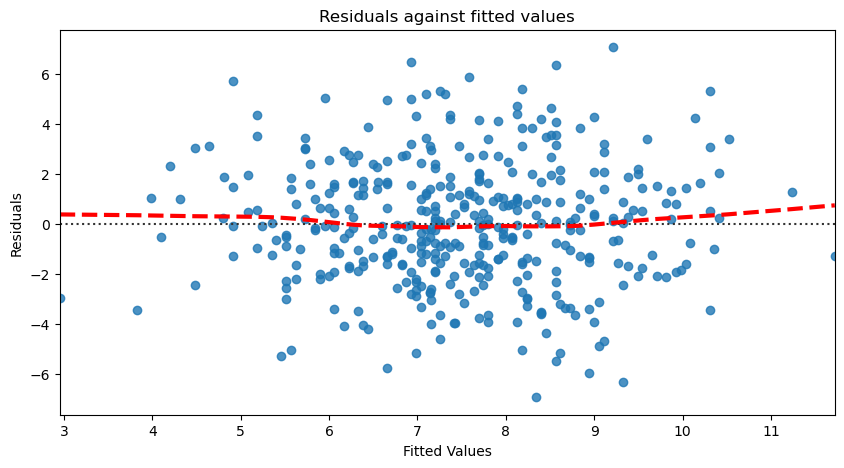

In [139]:
plt.figure(figsize=(10,5))
sns.residplot(x=result.fittedvalues,y=result.resid,lowess=True,
              line_kws={'color':'red','lw':3,'ls' : "--"})
plt.title("Residuals against fitted values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

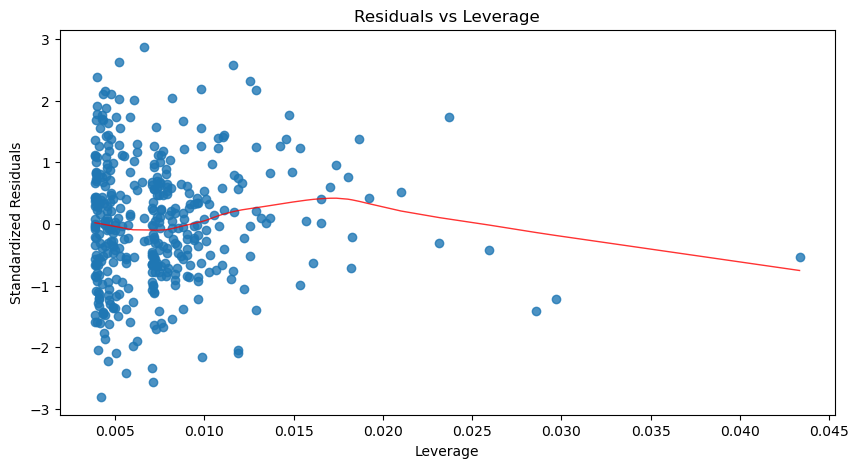

2.865082138252414

In [144]:
plt.figure(figsize=(10,5))
standardised_residual=result.get_influence().resid_studentized_internal
leverage=result.get_influence().hat_matrix_diag
sns.regplot(y=standardised_residual,x=leverage,scatter=True, 
            ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title("Residuals vs Leverage")
plt.xlabel("Leverage")
plt.ylabel("Standardized Residuals")
plt.show()
result.get_influence().resid_studentized_internal.max()

# Question 11

In [165]:
rng=np.random.default_rng(1)
x=rng.normal(size=100)
y=(2*x)+ rng.normal(size=100)

In [166]:
model=sm.OLS(y,x)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 04 Sep 2024   Prob (F-statistic):                    6.23e-31
Time:                        11:21:58   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
df=pd.DataFrame(data=[x.T,y.T]).transpose().rename(columns={0:"x",1:"y"})
X=MS('x',intercept=False).fit_transform(df)
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 04 Sep 2024   Prob (F-statistic):                    6.23e-31
Time:                        11:41:24   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
model=sm.OLS(x,y)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 04 Sep 2024   Prob (F-statistic):                    6.23e-31
Time:                        11:42:21   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
X=MS('x',intercept=True).fit_transform(df)
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.74e-30
Time:                        12:04:25   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0760      0.101     -0.756      0.451      -0.276       0.124
x              1.9686      0.118     16.734      0.000       1.735       2.202
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
X=MS('y',intercept=True).fit_transform(df)
y=df['x']
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.74e-30
Time:                        12:05:26   Log-Likelihood:                -58.325
No. Observations:                 100   AIC:                             120.6
Df Residuals:                      98   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0095      0.044      0.216      0.829      -0.078       0.097
y              0.3763      0.022     16.734      0.000       0.332       0.421
==============================================================================
Omnibus:                       13.123   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.501
Skew:                          -0.528   Prob(JB):                     1.30e-05
Kurtosis:                       5.070   Cond. No.                         1.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 12

In [57]:
x=np.random.normal(size=100)
y=np.random.normal(size=100)+np.random.random(100)
print(np.square(x).sum(),np.square(y).sum())

print(summarize(sm.OLS(y,x).fit()))
summarize(sm.OLS(x,y).fit())

92.61225506673979 143.60531404856266
     coef  std err      t  P>|t|
x1 -0.088    0.125 -0.705  0.482


,coef,std err,t,P>|t|
x1,-0.0568,0.081,-0.705,0.482


In [91]:
rng=np.random.default_rng(seed=12)
x=rng.integers(0,1000,size=100)
# print(x)
y=np.random.permutation(x)
print(summarize(sm.OLS(y,x).fit()))
summarize(sm.OLS(x,y).fit())

      coef  std err       t  P>|t|
x1  0.7871    0.062  12.695    0.0


,coef,std err,t,P>|t|
x1,0.7871,0.062,12.695,0.0


# Question 13

In [73]:
np.random.seed(1)
X=np.random.normal(scale=1,size=100)
eps=np.random.normal(scale=0.25,size=100)

In [74]:
Y=-1+(0.5*X)+eps

print(len(Y))
print(f"beta-naught = {-1} and beta-one = {0.5}")

100
beta-naught = -1 and beta-one = 0.5


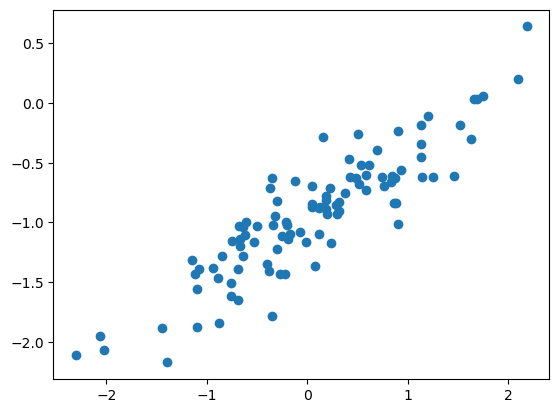

In [75]:
plt.scatter(X,Y)

In [76]:
df=pd.DataFrame(data=[np.ones(X.shape[0]),X,Y],
                index=['intercept','X','Y']).transpose()
df

,intercept,X,Y
0,1.0,1.624345,-0.299609
1,1.0,-0.611756,-0.999751
2,1.0,-0.528172,-1.163213
3,1.0,-1.072969,-1.388090
4,1.0,0.865408,-0.841024
...,...,...,...
95,1.0,0.077340,-1.368190
96,1.0,-0.343854,-1.021347
97,1.0,0.043597,-0.873131
98,1.0,-0.620001,-1.107263


In [77]:
x=MS(['X']).fit_transform(df)
sm.OLS(Y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           5.39e-36
Time:                        02:21:17   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9632      0.023    -40.999      0.000      -1.010      -0.917
X              0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
print("confidence interval =")
sm.OLS(Y,x).fit().conf_int()

confidence interval =


,0,1
intercept,-1.009870,-0.916623
X,0.471307,0.576407


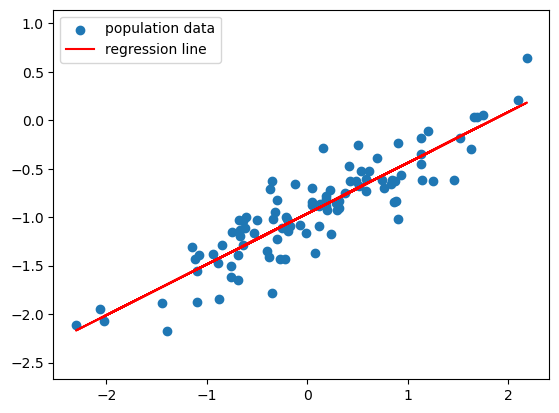

In [79]:
y=-0.9632+(0.5239*X)
plt.scatter(X,Y,label="population data")
plt.plot(X,y,'r',label="regression line")
plt.ylim(Y.min()-0.5,Y.max()+0.5)
plt.legend()

In [80]:
x=MS([poly('X',degree=2)]).fit_transform(df)
sm.OLS(Y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.32e-34
Time:                        02:21:18   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -0.9315      0.024    -39.544      0.000      -0.978      -0.885
poly(X, degree=2)[0]     4.6370      0.236     19.685      0.000       4.169       5.104
poly(X, degree=2)[1]     0.0427      0.236      0.181      0.856      -0.425       0.510
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
print("confidence interval =")
sm.OLS(Y,x).fit().conf_int()

confidence interval =


,0,1
intercept,-0.978262,-0.884758
"poly(X, degree=2)[0]",4.169428,5.104474
"poly(X, degree=2)[1]",-0.424813,0.510233


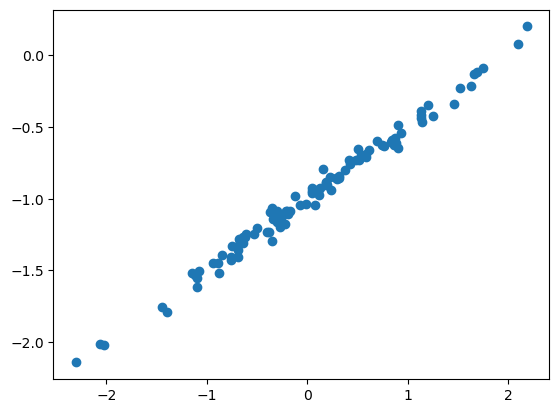

In [82]:
np.random.seed(1)
X=np.random.normal(scale=1,size=100)
eps=np.random.normal(scale=0.05,size=100)
Y=-1+(0.5*X)+eps
plt.scatter(X,Y)

In [83]:
df=pd.DataFrame(data=[np.ones(X.shape[0]),X,Y],
                index=['intercept','X','Y']).transpose()
x=MS(['X']).fit_transform(df)
sm.OLS(Y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9084.
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.97e-98
Time:                        02:21:19   Log-Likelihood:                 165.13
No. Observations:                 100   AIC:                            -326.3
Df Residuals:                      98   BIC:                            -321.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9926      0.005   -211.252      0.000      -1.002      -0.983
X              0.5048      0.005     95.309      0.000       0.494       0.515
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
print("confidence interval =")
sm.OLS(Y,x).fit().conf_int()

confidence interval =


,0,1
intercept,-1.001974,-0.983325
X,0.494261,0.515281


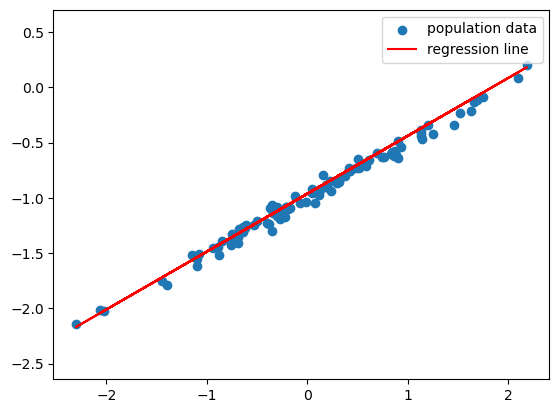

In [85]:
y=-0.9632+(0.5239*X)
plt.scatter(X,Y,label="population data")
plt.plot(X,y,'r',label="regression line")
plt.ylim(Y.min()-0.5,Y.max()+0.5)
plt.legend()

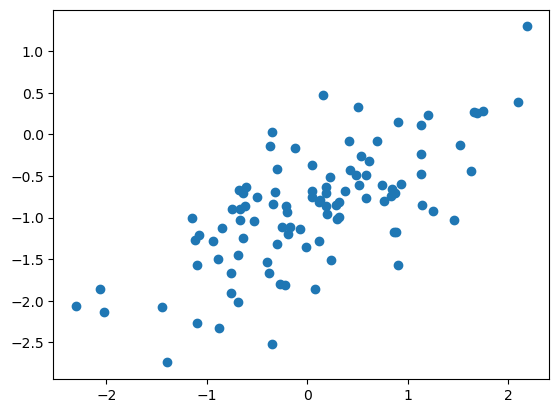

In [86]:
np.random.seed(1)
X=np.random.normal(scale=1,size=100)
eps=np.random.normal(scale=0.55,size=100)
Y=-1+(0.5*X)+eps
plt.scatter(X,Y)

In [87]:
df=pd.DataFrame(data=[np.ones(X.shape[0]),X,Y],
                index=['intercept','X','Y']).transpose()
x=MS(['X']).fit_transform(df)
sm.OLS(Y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     89.94
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.60e-15
Time:                        02:21:20   Log-Likelihood:                -74.655
No. Observations:                 100   AIC:                             153.3
Df Residuals:                      98   BIC:                             158.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9191      0.052    -17.783      0.000      -1.022      -0.817
X              0.5525      0.058      9.483      0.000       0.437       0.668
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
print("confidence interval =")
sm.OLS(Y,x).fit().conf_int()

confidence interval =


,0,1
intercept,-1.021715,-0.816570
X,0.436875,0.668095


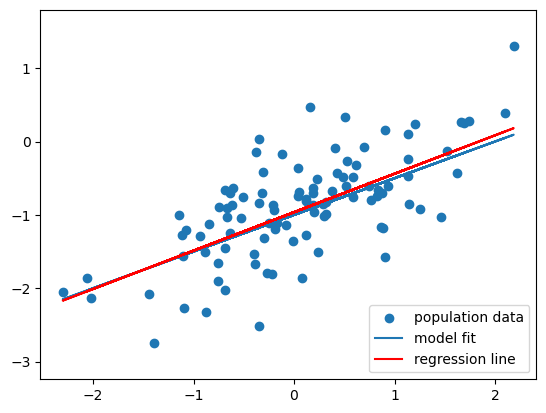

In [102]:
y=-0.9632+(0.5239*X)
plt.scatter(x=X,y=Y,label="population data")
y_=-1 + (0.5*X)
plt.plot(X,y_,label="model fit")
plt.plot(X,y,'r',label="regression line")
plt.ylim(Y.min()-0.5,Y.max()+0.5)
plt.legend(loc=4)

# Question 14

In [4]:
rng=np.random.default_rng(10)
x1=rng.uniform(0,1,size=100)
x2=0.5*x1 + rng.normal(size=100)/10
y=2+2*x1+0.3*x2+rng.normal(size=100)

          x1        x2
x1  1.000000  0.772324
x2  0.772324  1.000000
[[1.        0.7723245]
 [0.7723245 1.       ]]


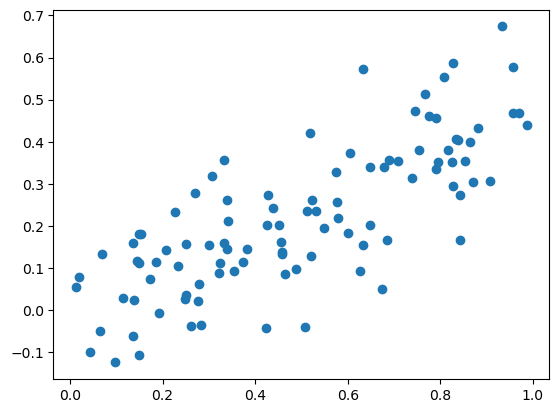

In [11]:
print(pd.DataFrame(data=[x1,x2],index=['x1','x2']).transpose().corr())
print(np.corrcoef(x1,x2))
plt.scatter(x=x1,y=x2)

In [17]:
df=pd.DataFrame(data=[np.ones(x1.shape[0]),x1,x2,y],index=['intercept','x1','x2','y']).transpose()
X=MS(['x1','x2']).fit_transform(df)
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           5.76e-08
Time:                        01:19:18   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
X=MS(['x1']).fit_transform(df)
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.37e-08
Time:                        01:21:25   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X=MS(['x2']).fit_transform(df)
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           7.43e-07
Time:                        01:26:19   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
x1=np.concatenate([x1,[0.1]])
x2=np.concatenate([x2,[0.8]])
y=np.concatenate([y,[6]])

In [37]:
X=pd.DataFrame({'x1':x1,'x2':x2,'y':y})
X=sm.add_constant(X)
model=sm.OLS(y,MS(['x1','x2']).fit_transform(X))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           4.60e-08
Time:                        01:48:31   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model=sm.OLS(y,MS(['x1']).fit_transform(X))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           9.23e-07
Time:                        01:35:42   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model=sm.OLS(y,MS(['x2']).fit_transform(X))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           3.13e-08
Time:                        01:35:53   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2840      0.151     15.088      0.000       1.984       2.584
x2             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

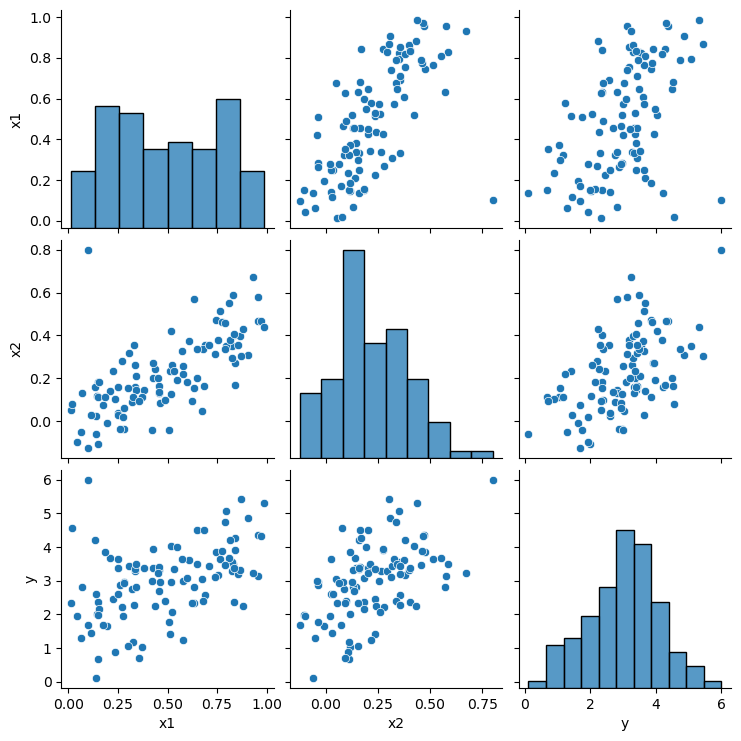

In [36]:
sns.pairplot(X.drop(columns=['const']))

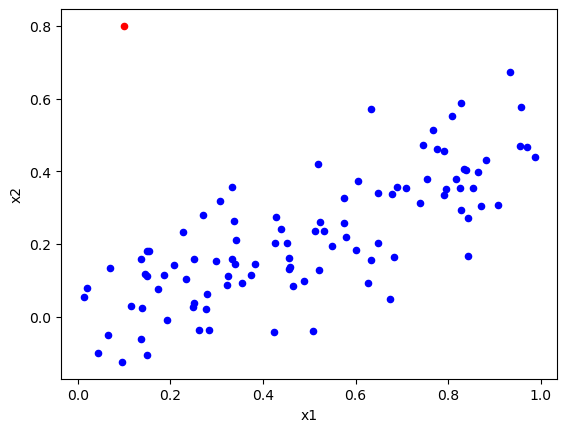

In [39]:
# Bivariate analysis (x1,x2)
sample = X.iloc[-1:]  # To get the last observation
other = X.iloc[:-1]  # To get all the observations but the last
ax = other.plot(kind='scatter',x='x1',y='x2', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x1',y='x2', color='red');  # Plot last observation added in red

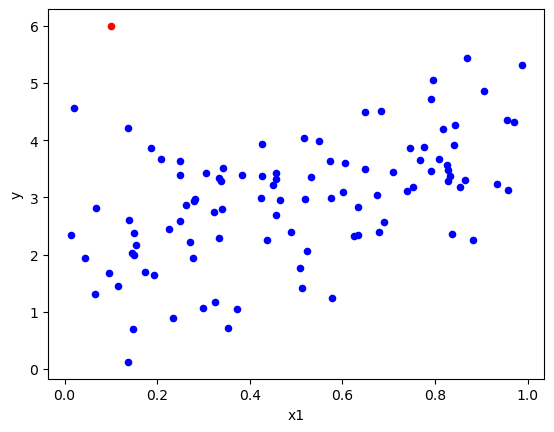

In [41]:
# Bivariate analysis (x1,y)
sample = X.iloc[-1:]  # To get the last observation
other = X.iloc[:-1]  # To get all the observations but the last
ax = other.plot(kind='scatter',x='x1',y='y', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x1',y='y', color='red');  # Plot last observation added in red

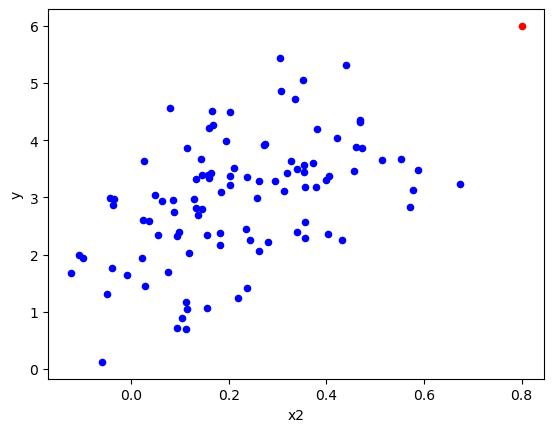

In [42]:
# Bivariate analysis (x2,y)
sample = X.iloc[-1:]  # To get the last observation
other = X.iloc[:-1]  # To get all the observations but the last
ax = other.plot(kind='scatter',x='x2',y='y', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x2',y='y', color='red');  # Plot last observation added in red


# Question 15

In [147]:
Boston=ISLP.load_data('Boston')
Boston=sm.add_constant(Boston)
Y=Boston['crim']
Boston=pd.get_dummies(Boston,columns=['chas'],drop_first=True)
Boston[:2]

,const,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,chas_1
0,1.0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,False
1,1.0,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,False


In [148]:
summarize(sm.OLS(Y,MS(['zn']).fit_transform(Boston)).fit())

,coef,std err,t,P>|t|
intercept,4.4537,0.417,10.675,0.0
zn,-0.0739,0.016,-4.594,0.0


In [149]:
for indx in Boston.columns.drop(['const','crim']):
    print(summarize(sm.OLS(Y,MS([indx]).fit_transform(Boston)).fit()),"\n")

             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0 

             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000 

              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0 

              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0 

             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0 

             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0 

             coef  std err       t  P>|t|
intercept -2.2872    0.443  -5.157    0.0
rad        0.6179    0.034  17.998    0.0 

             coef  std err       t  P>|t|
intercept -8.5284    0.816 -10.454    0.0
tax        0.0297    0.

In [150]:
a=sm.OLS(Y,MS([indx]).fit_transform(Boston)).fit()
dir(a)
a.params.iloc[0]

3.7444468365180468

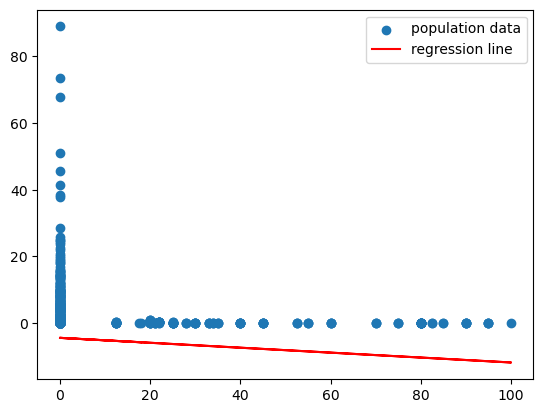

In [151]:
X=Boston['zn']
y=-4.4537+(-0.0739*X)
plt.scatter(x=X,y=Boston['crim'],label="population data")
# y_=-1 + (0.5*X)
# plt.plot(X,y_,label="model fit")
plt.plot(X,y,'r',label="regression line")
# plt.ylim(Y.min()-0.5,Y.max()+0.5)
plt.legend()

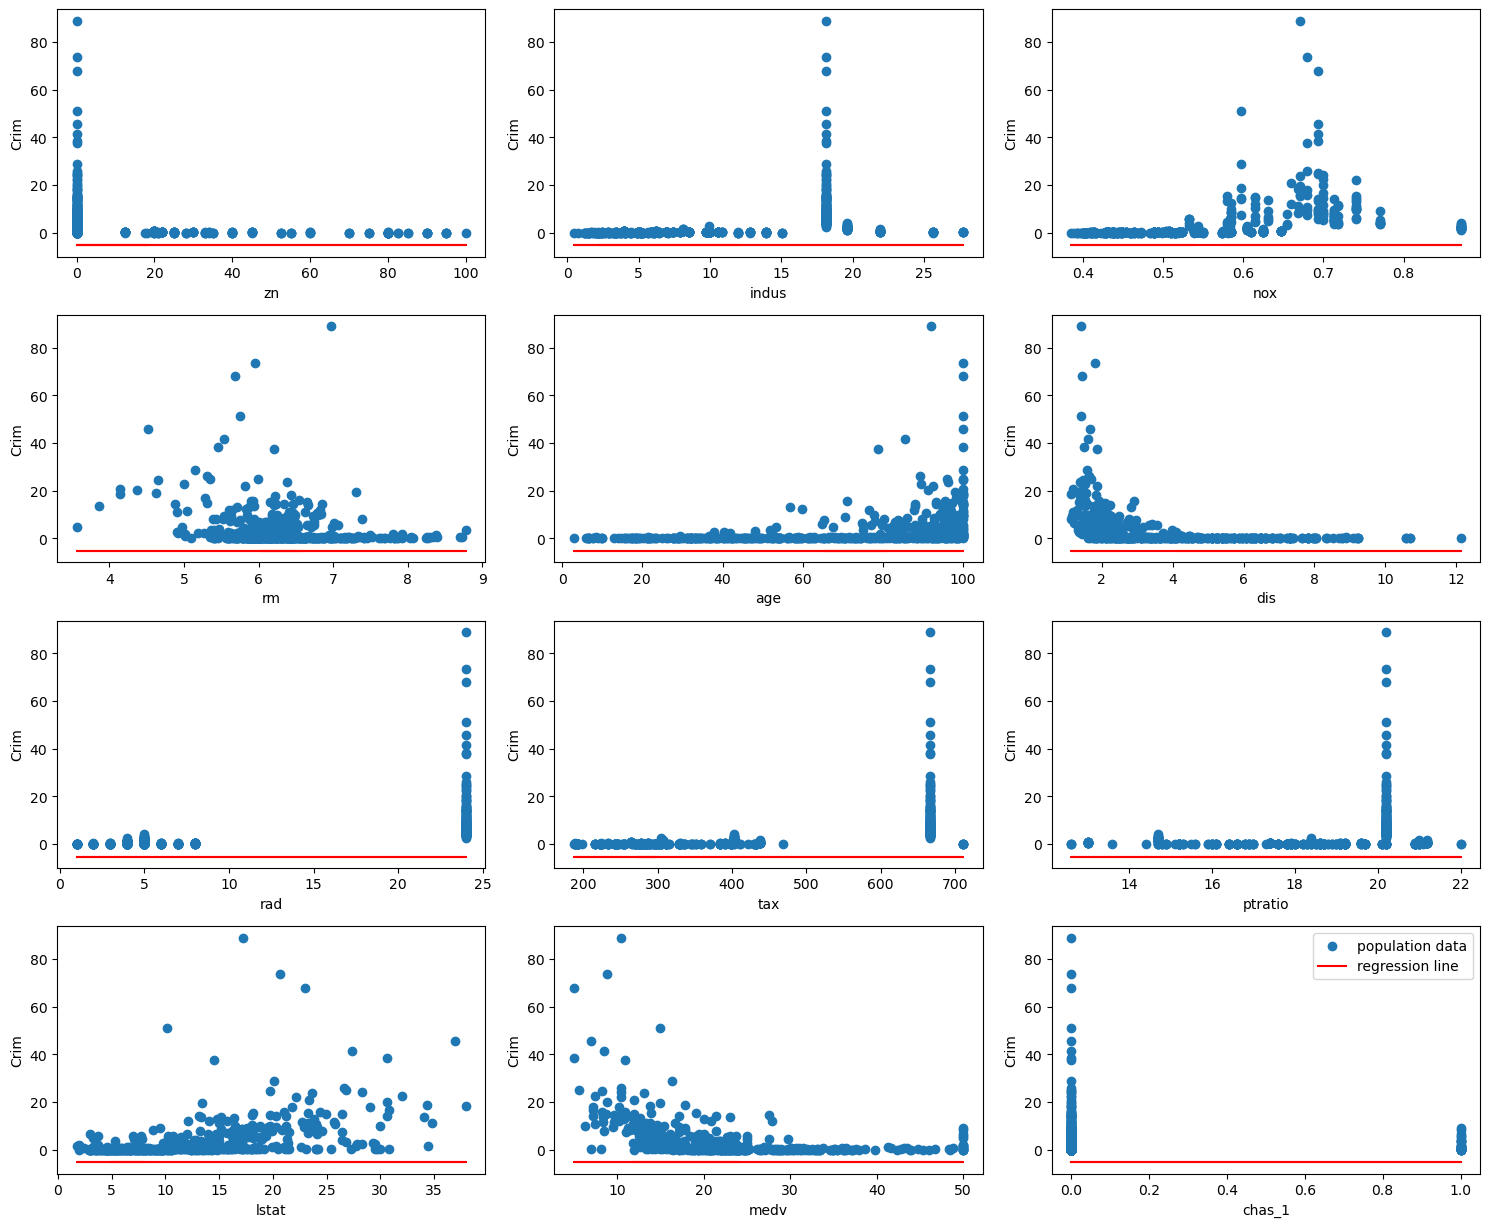

In [144]:
plt.figure(figsize=(15,15))
org_y=Boston['crim']
# _,ax=plt.subplots(figsize=(10,10),ncols=5,nrows=3)
for indx,val in enumerate(Boston.columns.drop(['const','crim'])):
    result=sm.OLS(Y,MS([val]).fit_transform(Boston)).fit()
    X=Boston[val]
    plt.subplot(5,3,indx+1)
    plt.scatter(x=X,y=org_y,label="population data")
    plt.plot(X,result.fittedvalues,'r',label="regression line")
    plt.ylabel('Crim')
    plt.xlabel(val)

plt.legend()
plt.tight_layout()

In [195]:
idx=Boston.columns.drop(['crim','const'])
print(idx)
result=sm.OLS(Y,MS([*idx]).fit_transform(Boston)).fit()
result.summary()

Index(['zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio',
       'lstat', 'medv', 'chas_1'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.03e-56
Time:                        03:45:55   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
chas_1        -0.8254      1.183     -0.697      0.486      -3.150       1.500
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
result.params

intercept    13.778394
zn            0.045710
indus        -0.058350
nox          -9.957587
rm            0.628911
age          -0.000848
dis          -1.012247
rad           0.612465
tax          -0.003776
ptratio      -0.304073
lstat         0.138801
medv         -0.220056
chas_1       -0.825378
dtype: float64

In [197]:
d={}
for indx in Boston.columns.drop(['const','crim']):
    d[indx]=sm.OLS(Y,MS([indx]).fit_transform(Boston)).fit().params.iloc[1]
d=pd.DataFrame(data=d,index=[1]).transpose().rename(columns={1:"univar"})
d

,univar
zn,-0.073935
indus,0.509776
nox,31.248531
rm,-2.684051
age,0.107786
dis,-1.550902
rad,0.617911
tax,0.029742
ptratio,1.151983
lstat,0.548805


In [198]:
pd.DataFrame(result.params.iloc[1:],columns=['multivar'])

,multivar
zn,0.045710
indus,-0.058350
nox,-9.957587
rm,0.628911
age,-0.000848
dis,-1.012247
rad,0.612465
tax,-0.003776
ptratio,-0.304073
lstat,0.138801


In [199]:
new_df=pd.concat([d,pd.DataFrame(result.params.iloc[1:],columns=['multivar'])],axis=1)
new_df

,univar,multivar
zn,-0.073935,0.045710
indus,0.509776,-0.058350
nox,31.248531,-9.957587
rm,-2.684051,0.628911
age,0.107786,-0.000848
dis,-1.550902,-1.012247
rad,0.617911,0.612465
tax,0.029742,-0.003776
ptratio,1.151983,-0.304073
lstat,0.548805,0.138801


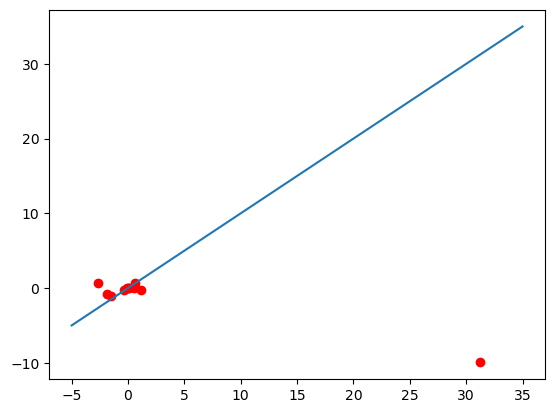

In [209]:
plt.scatter(x='univar',y='multivar',data=new_df,c='red')
plt.plot([-5,35],[-5,35])

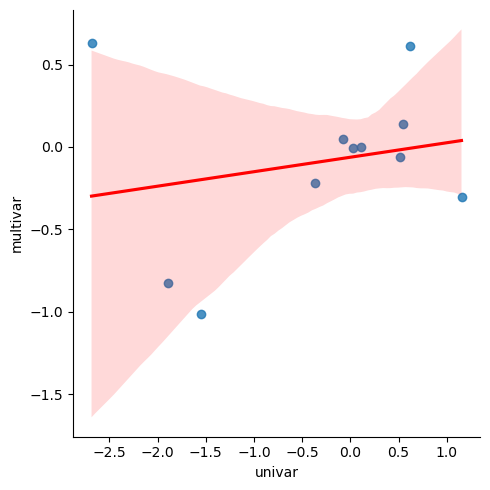

In [212]:
sns.lmplot(new_df.drop('nox'),x='univar',y='multivar',line_kws={'color':'red'})

In [248]:
result=sm.OLS(Y,MS([poly('nox',degree=3)]).fit_transform(Boston)).fit()
result.fittedvalues
result.params
    # y = result.params.iloc[0] + X*result.params.iloc[1]\
    # + result.params.iloc[2]*(X**2)+ result.params.iloc[3]*(X**3)
    # plt.plot(X,y,'r',label="regression line")

intercept                  3.613524
poly(nox, degree=3)[0]    81.372015
poly(nox, degree=3)[1]   -28.828594
poly(nox, degree=3)[2]   -60.361894
dtype: float64

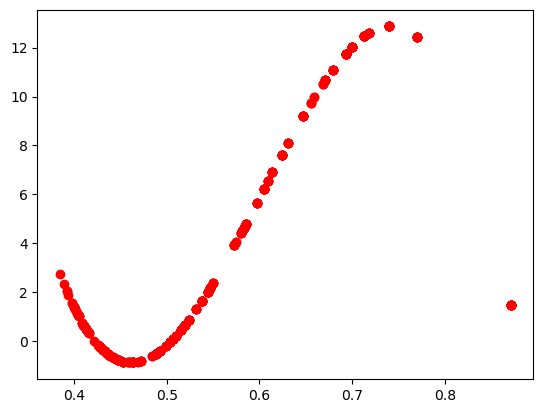

In [241]:
org_y=Boston['crim']
result=sm.OLS(Y,MS([poly('nox',degree=3)]).fit_transform(Boston)).fit()
X=Boston['nox']
# plt.scatter(x=X,y=org_y,label="population data")
plt.scatter(X,result.fittedvalues,c='r',label="regression line")

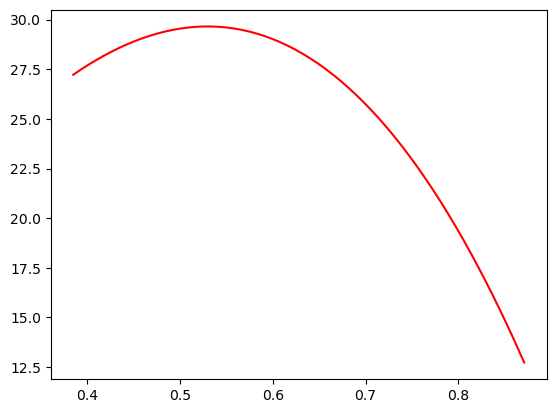

In [246]:
x = np.linspace(min(Boston['nox']),max(Boston['nox']), 60)
y = result.params.iloc[0] + x*result.params.iloc[1]+result.params.iloc[2]*(x**2)+ result.params.iloc[3]*(x**3)
plt.plot(x, y, color='red') 

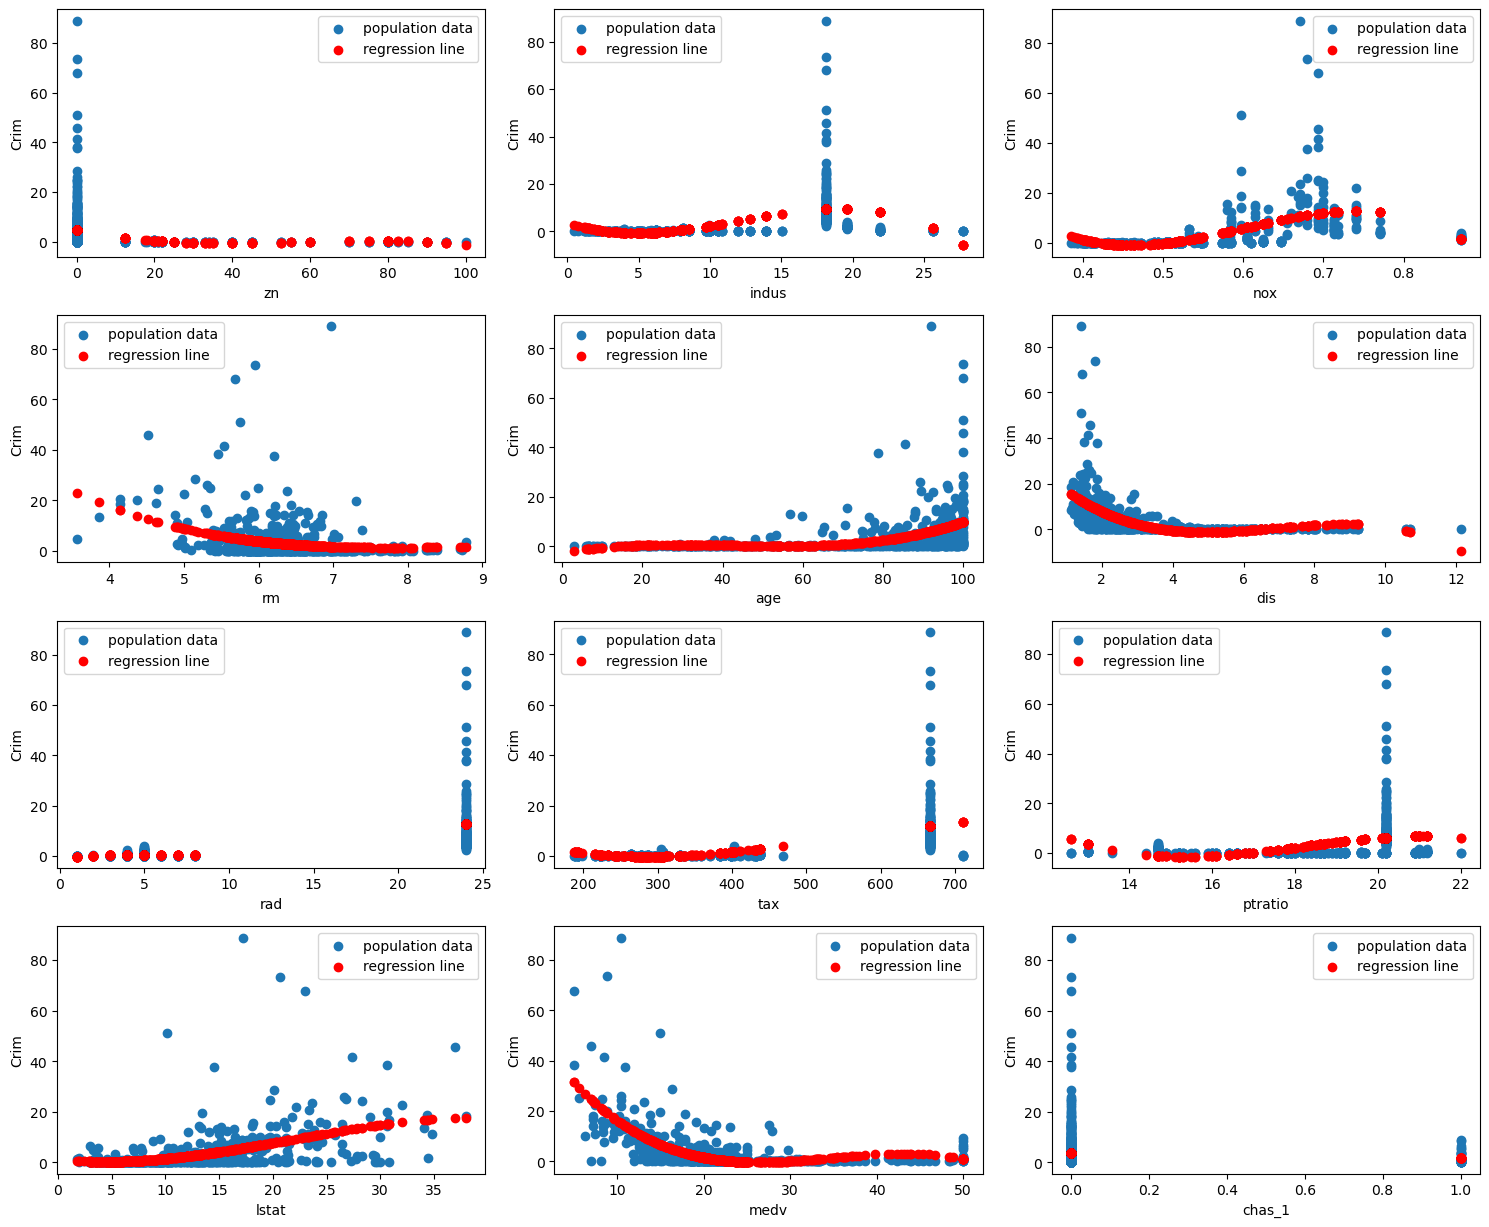

In [255]:
plt.figure(figsize=(15,15))
for indx,val in enumerate(Boston.columns.drop(['const','crim'])):
    result=sm.OLS(Y,MS([poly(val,degree=3)]).fit_transform(Boston)).fit()
    X=Boston[val]
    plt.subplot(5,3,indx+1)
    plt.scatter(x=X,y=org_y,label="population data")
    plt.scatter(X,result.fittedvalues,c='r',label="regression line")#,s=5*np.ones(X.shape[0]))
    plt.ylabel('Crim')
    plt.xlabel(val)
    plt.legend()
    
plt.tight_layout()

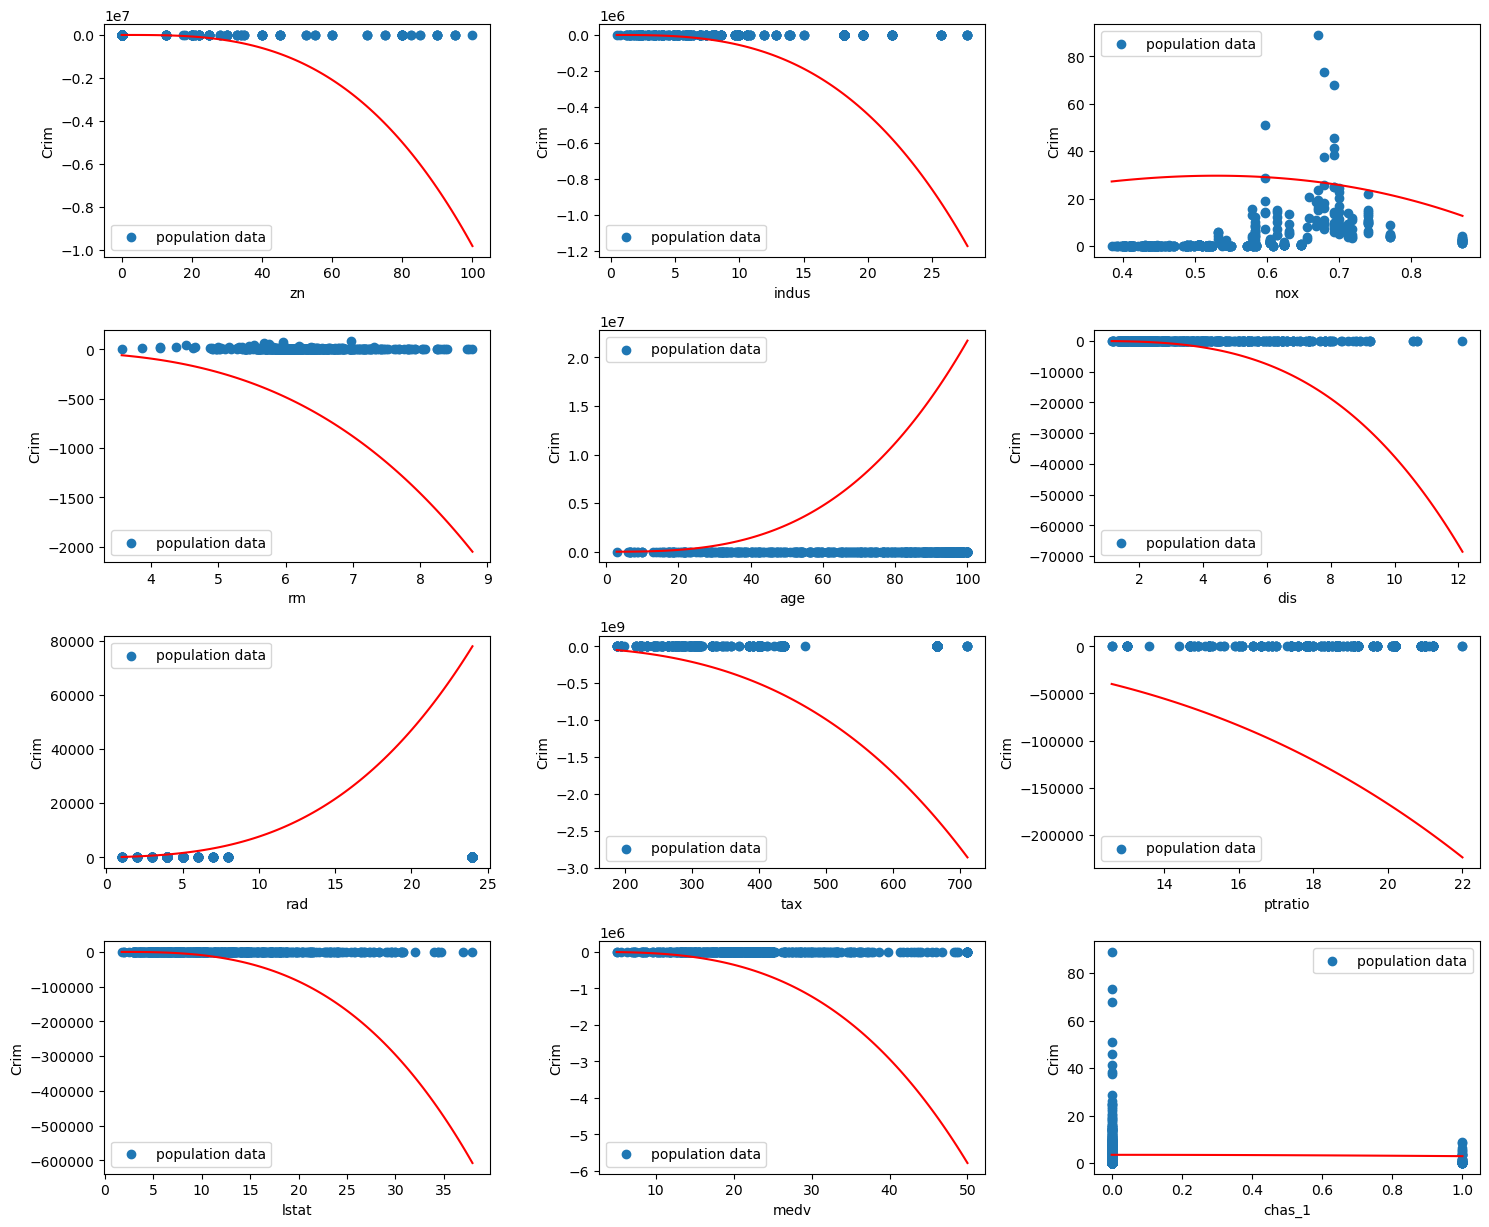

In [240]:
#somehow this method is showing wrong plots
plt.figure(figsize=(15,15))
for indx,val in enumerate(Boston.columns.drop(['const','crim'])):
    result=sm.OLS(Y,MS([poly(val,degree=3)]).fit_transform(Boston)).fit()
    X=Boston[val]
    plt.subplot(5,3,indx+1)
    plt.scatter(x=X,y=org_y,label="population data")
    x = np.linspace(min(Boston[val]),max(Boston[val]), 100)
    y = result.params.iloc[0] + x*result.params.iloc[1]+result.params.iloc[2]*(x**2)+ result.params.iloc[3]*(x**3)
    plt.plot(x, y, color='red')
    plt.ylabel('Crim')
    plt.xlabel(val)
    plt.legend()
    
plt.tight_layout()